## Parameters

You can import default parameters for the cadCAD model to be used within the system. For our sweep example, we need to distinguish between how to do multiple options versus a single option.

For all parameters, there is two lengths which the list can have:
- 1 (meaning the parameter is used for all sweeps)
- N (meaning for the N parameter sweeps, there are N different values)

The value for N can be anything, but all paramters that are not of length 1 have to have length of N.

In [1]:
# Import a set of default parameters
from IPython.display import display
from model.utility.default_parameters import default_params1 as params

display(params)

{'demand_factor': [0.07],
 'supply_factor': [-0.07],
 'initial_reserves_volatile': [25000000],
 'max_liq_ratio': [0.14375],
 'target_ma': [30],
 'lower_wall': [0.15],
 'upper_wall': [0.15],
 'lower_cushion': [0.075],
 'upper_cushion': [0.075],
 'reinstate_window': [30],
 'max_outflow_rate': [0.05],
 'reward_rate_policy': ['Flat'],
 'ask_factor': [0.095],
 'bid_factor': [0.095],
 'cushion_factor': [0.3075],
 'min_counter_reinstate': [6],
 'with_reinstate_window': ['Yes'],
 'bond_create_schedule': [   start_days                                              bonds
  0           1  [OHMbond(total_amount=1000000.0, expiration_du...],
 'bond_annual_discount_rate': [0.04],
 'ohm_bond_to_netflow_ratio': [0.5]}

In [2]:
# For example, we can have two sets of values for demand and supply to see the differences

params["demand_factor"] = [0.01, .025]
params["supply_factor"] = [-.01, -.025]
display(params)

{'demand_factor': [0.01, 0.025],
 'supply_factor': [-0.01, -0.025],
 'initial_reserves_volatile': [25000000],
 'max_liq_ratio': [0.14375],
 'target_ma': [30],
 'lower_wall': [0.15],
 'upper_wall': [0.15],
 'lower_cushion': [0.075],
 'upper_cushion': [0.075],
 'reinstate_window': [30],
 'max_outflow_rate': [0.05],
 'reward_rate_policy': ['Flat'],
 'ask_factor': [0.095],
 'bid_factor': [0.095],
 'cushion_factor': [0.3075],
 'min_counter_reinstate': [6],
 'with_reinstate_window': ['Yes'],
 'bond_create_schedule': [   start_days                                              bonds
  0           1  [OHMbond(total_amount=1000000.0, expiration_du...],
 'bond_annual_discount_rate': [0.04],
 'ohm_bond_to_netflow_ratio': [0.5]}

In [3]:
import pandas as pd

# And we can also set a parameter (here setting it so no bonds are made) to have just length 1
# So that is applies to all simulations
params["bond_create_schedule"] = [pd.DataFrame([], columns = ['start_days', 'bonds'])]

## Initial State

Starting state for the simulation needs to be specified but also comes with defaults. Some of the initial state variables, however, do get influenced by the parameters so there is a step to prep those variables that do get set based upon that.

In [4]:
# Import a default initial state
from model.utility.default_initial_state import default_initial_state1 as initial_state

display(initial_state)

{'liq_stables': 21000000,
 'reserves_stables': 170000000,
 'reserves_volatile': 25000000,
 'price': 9.5,
 'reward_rate': 0.000198,
 'market_demand_supply': MarketDemandSupply(total_supply=0.001, total_demand=-0.008),
 'target_liq_ratio_reached': False,
 'reserves_in': 0,
 'supply': 25000000,
 'ma_target': 9.5,
 'ask_change_ohm': 0,
 'bid_change_ohm': 0,
 'net_flow': None,
 'bid_capacity_target': None,
 'ask_capacity_target': None,
 'bid_capacity_target_cushion': None,
 'ask_capacity_target_cushion': None,
 'natural_price': None,
 'bid_capacity_cushion': None,
 'ask_capacity_cushion': None,
 'bid_change_cushion_usd': None,
 'bid_change_cushion_ohm': None,
 'ask_change_cushion_usd': None,
 'ask_change_cushion_ohm': None,
 'bid_change_usd': None,
 'ask_change_usd': None,
 'reserves_out': None,
 'ohm_traded': None,
 'cum_ohm_purchased': 0,
 'cum_ohm_burnt': 0,
 'cum_ohm_minted': 0,
 'cum_ohm_minted_forbond': 0,
 'cum_ohm_burned_frombond': 0,
 'netflow_bondexpire': 0,
 'netflow_bondsale': 0

In [5]:
# Fill in the initial state
from model.utility.initial_state_functions import fill_in_initial_state

initial_state = fill_in_initial_state(initial_state, params)

## Run Experiment

You can set two parameters for the simulation model at this phase. The number of monte carlo runs (number_runs) and the number of timesteps for each run (number_steps). Then you load the experiment with load_config, get raw output from running the experiment, and finally apply to post-processing function to parse the data into a smaller and enhanced dataframe.

For each of the N parameter sweeps, there will be the set number of monte carlo runs ran.

In [6]:
from model.run import load_config, run, post_processing

# Set the params for runs and timesteps
number_runs = 3
number_steps = 100

# Load the experiment
exp = load_config(number_runs, params, initial_state, number_steps)

# Run the experiment
raw = run(exp)

# Parse the raw data
df = post_processing(raw)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 20, 6, 67)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 20, 6, 67)
Execution Method: local_simulations
Execution Mode: parallelized
Total execution time: 24.63s


## Visualization

There are functions to easily visualize some of the results of the cadCAD runs. Below we will show some graphics from the monte carlo simulations.

Some of these visualizations are based upon the aggregate simulations, and some are grouped by variables.

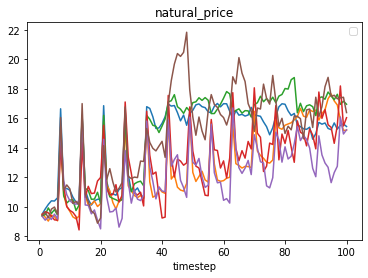

In [7]:
from model.utility.visualization import plot_all_sims

# Plot all simulation values for natural price
plot_all_sims(["natural_price"], df)

## Cartesian Sweep